In [6]:
from sklearn.svm import SVC
from sklearn.datasets import fetch_openml
from sklearn import datasets
from sklearn import metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import numpy as np
import random
import time

Ecrivez un programme appelé TP3_prog1.py qui permet de :
- Charger le jeu de données mnist,
- Diviser la base de données à 70% pour l’apprentissage (training) et à 30%
pour les tests,


In [7]:
mnist = fetch_openml('mnist_784', as_frame = False)

In [8]:
data = np.random.randint(70000, size=5000)
small_dataset = mnist.data[data]
small_targets = mnist.target[data]

In [4]:
xtrain, xtest, ytrain, ytest = train_test_split(small_dataset, small_targets, train_size=0.7)

EN se basant sur les fonctions usuelles :
- classifier = svm.SVC()
- classifier.fit()
- predicted = classifier.predict()

Construire un modèle de classification ayant comme paramètres un noyau
linear: clsvm = svm.SVC(kernel=’linear’).

Tentez d’améliorer les résultats en variant la fonction noyau : ‘poly’, ‘rbf’,
‘sigmoid’, ‘precomputed’.

In [5]:
scorelist = []
clist = []
tempslist = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernels:
    tps1 = time.time()
    classifier = SVC(kernel = kernel)
    classifier.fit(xtrain, ytrain)
    predicted = classifier.predict(xtest)
    tps2 = time.time()
    score = classifier.score(xtest, ytest)
    
    scorelist.append(score)
    clist.append(kernel)
    tempslist.append(tps2-tps1)
    print("Score avec kernel %s: %.4f" % (kernel, score))

Score avec kernel linear: 0.9140
Score avec kernel poly: 0.9387
Score avec kernel rbf: 0.9533
Score avec kernel sigmoid: 0.8547


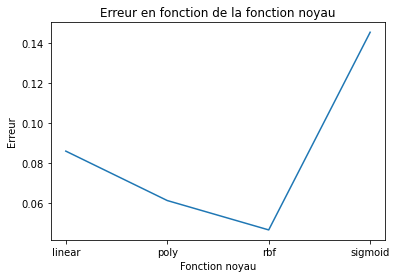

In [6]:
plt.title("Erreur en fonction de la fonction noyau")
plt.xlabel("Fonction noyau")
plt.ylabel("Erreur")
plt.plot(clist, np.ones(len(scorelist))-scorelist)

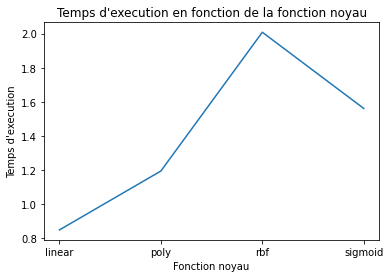

In [7]:
plt.title("Temps d'execution en fonction de la fonction noyau")
plt.xlabel("Fonction noyau")
plt.ylabel("Temps d'execution")
plt.plot(clist, tempslist)

Faites varier le paramètre de tolérance aux erreurs C (5 valeurs entre 0.1 et
1).

In [39]:
scorelist = []
clist = []
tempslist = []
for c in np.arange(0.1,1,0.2):
    tps1 = time.time()
    classifier = SVC(C = c)
    classifier.fit(xtrain, ytrain)
    predicted = classifier.predict(xtest)
    tps2 = time.time()
    score = classifier.score(xtest, ytest)
    
    scorelist.append(score)
    clist.append(c)
    tempslist.append(tps2-tps1)
    print("Score avec C = %.1f: %.4f" % (c, score))


Score avec C = 0.1: 0.9033
Score avec C = 0.3: 0.9200
Score avec C = 0.5: 0.9300
Score avec C = 0.7: 0.9407
Score avec C = 0.9: 0.9447


Tracez la courbe d’erreur de classification sur les données d’entrainement et
de test en fonction de C.

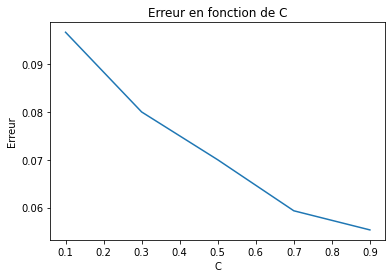

In [28]:
plt.title("Erreur en fonction de C")
plt.xlabel("C")
plt.ylabel("Erreur")
plt.plot(clist, np.ones(len(scorelist))-scorelist)

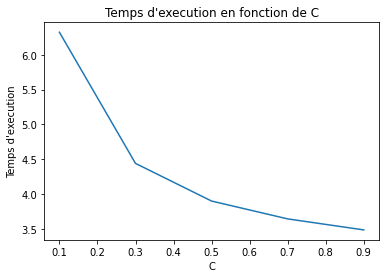

In [40]:
plt.title("Temps d'execution en fonction de C")
plt.xlabel("C")
plt.ylabel("Temps d'execution")
plt.plot(clist, tempslist)

Construisez la matrice de confusion en utilisant le package metrics

/usr/local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


array([[139,   0,   0,   0,   0,   1,   1,   0,   3,   0],
       [  0, 165,   1,   0,   0,   0,   0,   0,   0,   0],
       [  1,   0, 135,   2,   3,   1,   1,   0,   1,   0],
       [  0,   1,   3, 156,   0,   1,   1,   2,   3,   0],
       [  0,   1,   0,   0, 134,   0,   2,   0,   1,   2],
       [  1,   0,   1,   3,   0, 130,   3,   0,   2,   0],
       [  0,   1,   2,   0,   0,   1, 142,   0,   2,   0],
       [  0,   0,   3,   1,   2,   0,   0, 144,   0,   2],
       [  0,   2,   1,   4,   1,   2,   0,   0, 135,   1],
       [  1,   0,   1,   2,   3,   0,   0,   7,   2, 137]])

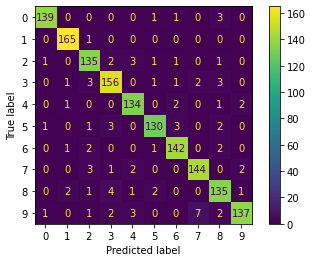

In [41]:
cm = confusion_matrix(ytest, predicted)
metrics.plot_confusion_matrix(classifier, xtest, ytest)
cm

Modèle avec paramètres optimaux

In [12]:
tps1 = time.time()
classifier = SVC(C = 0.9, kernel = 'rbf')
classifier.fit(xtrain, ytrain)
predicted = classifier.predict(xtest)
tps2 = time.time()
score = classifier.score(xtest, ytest)
metrics.precision_score(ytest, predicted, average = 'macro')
print(tps2 - tps1)


3.273545742034912


In [15]:
error_ = metrics.zero_one_loss(ytest, predicted)
print(error_)

0.052000000000000046
